<a href="https://colab.research.google.com/github/A714104/codsoft/blob/main/task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic Regression Accuracy: 1.0

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



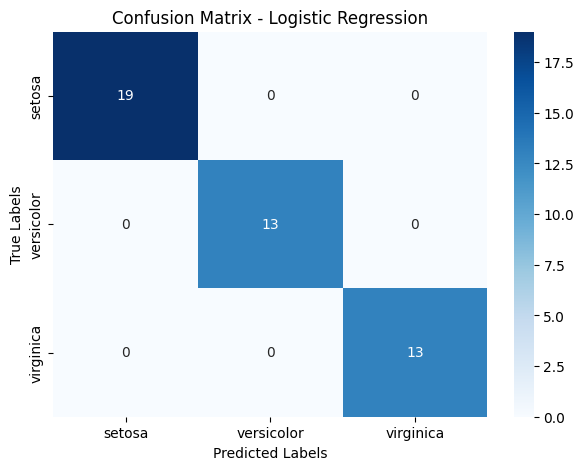


SVM Accuracy: 0.9777777777777777

SVM Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]

SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



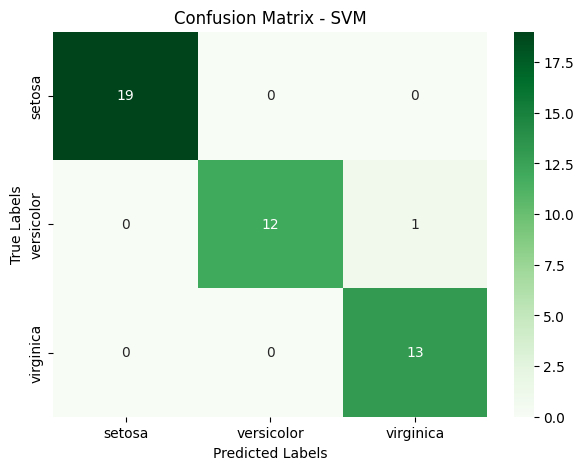

In [2]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 2: Load the Iris dataset
iris = load_iris()
X = iris.data  # Features: sepal_length, sepal_width, petal_length, petal_width
y = iris.target  # Target labels: 0 = setosa, 1 = versicolor, 2 = virginica

# Step 3: Convert to a DataFrame for better visualization (optional)
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = iris.target_names[y]

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train a Logistic Regression model
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train_scaled, y_train)

# Step 7: Make predictions
y_pred = logreg.predict(X_test_scaled)

# Step 8: Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 9: Visualize the confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Step 10: (Optional) Train a Support Vector Machine (SVM) model for comparison
svm = SVC(kernel='linear')  # You can try other kernels like 'rbf', 'poly'
svm.fit(X_train_scaled, y_train)

# Step 11: Make predictions with the SVM model
y_pred_svm = svm.predict(X_test_scaled)

# Step 12: Evaluate the SVM model
print("\nSVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nSVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))

# Step 13: (Optional) Visualize the confusion matrix for the SVM model
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Greens',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
